In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/kaggle/input/counter-strike-global-offensive-matches/csgo_games.csv")
df.head(10)

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
5,2016-12-17,FAZE,IMMORTALS,16,11,8,13,0.500000,0.500000,t1,...,0.66,0.07,0.82,0.96,0.737,0.135,0.152679,0.557,False,0.733333
6,2016-12-17,NIP,OPTIC,9,16,3,4,0.833333,0.166667,t2,...,0.66,0.08,1.00,1.03,0.737,0.149,0.173077,0.696,False,0.562500
7,2016-12-17,CLOUD9,RENEGADES,16,9,9,19,0.800000,0.200000,t1,...,0.66,0.11,0.93,0.97,0.804,0.135,0.151456,0.500,False,0.714286
8,2016-12-17,GODSENT,HELLRAISERS,16,11,17,20,0.444444,0.555556,t1,...,0.67,0.10,0.95,0.91,0.774,0.112,0.163958,0.538,False,0.750000
9,2016-12-16,FAZE,OPTIC,16,11,8,4,0.200000,0.800000,t1,...,0.65,0.08,1.00,1.03,0.737,0.149,0.173550,0.702,False,0.593750


In [3]:
df.columns.values

array(['match_date', 'team_1', 'team_2', 't1_points', 't2_points',
       't1_world_rank', 't2_world_rank', 't1_h2h_win_perc',
       't2_h2h_win_perc', 'winner', 't1_player1_rating',
       't1_player1_impact', 't1_player1_kdr', 't1_player1_dmr',
       't1_player1_kpr', 't1_player1_apr', 't1_player1_dpr',
       't1_player1_spr', 't1_player1_opk_ratio', 't1_player1_opk_rating',
       't1_player1_wins_perc_after_fk', 't1_player1_fk_perc_in_wins',
       't1_player1_multikill_perc', 't1_player1_rating_at_least_one_perc',
       't1_player1_is_sniper', 't1_player1_clutch_win_perc',
       't1_player2_rating', 't1_player2_impact', 't1_player2_kdr',
       't1_player2_dmr', 't1_player2_kpr', 't1_player2_apr',
       't1_player2_dpr', 't1_player2_spr', 't1_player2_opk_ratio',
       't1_player2_opk_rating', 't1_player2_wins_perc_after_fk',
       't1_player2_fk_perc_in_wins', 't1_player2_multikill_perc',
       't1_player2_rating_at_least_one_perc', 't1_player2_is_sniper',
       't1_play

In [4]:
# en çok maç yapan takımlar
most_occured_teams = df['team_1'].value_counts().head(8) + df['team_2'].value_counts().head(8)
most_occured_teams.sort_values(ascending=False)

ASTRALIS         526
FAZE             505
MOUSESPORTS      472
NIP              463
G2               459
FNATIC           417
NATUS VINCERE    396
LIQUID           378
Name: count, dtype: int64

<Axes: >

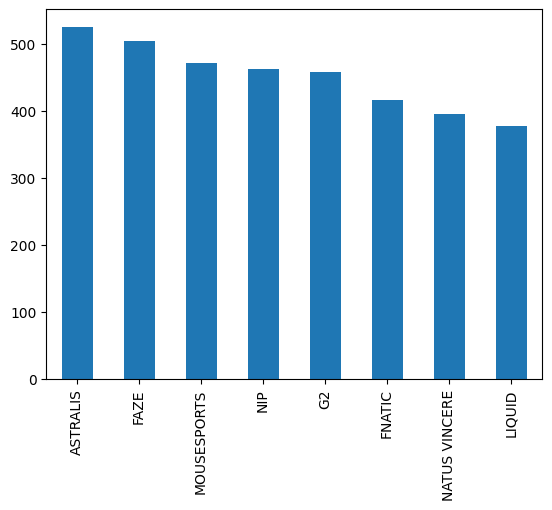

In [5]:
most_occured_teams.sort_values(ascending=False).plot(kind='bar')

In [6]:
#her bir sütundaki veri tipleri
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 170 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    match_date                           object 
 1    team_1                               object 
 2    team_2                               object 
 3    t1_points                            int64  
 4    t2_points                            int64  
 5    t1_world_rank                        int64  
 6    t2_world_rank                        int64  
 7    t1_h2h_win_perc                      float64
 8    t2_h2h_win_perc                      float64
 9    winner                               object 
 10   t1_player1_rating                    float64
 11   t1_player1_impact                    float64
 12   t1_player1_kdr                       float64
 13   t1_player1_dmr                       float64
 14   t1_player1_kpr                       float64
 15   t1_player1_apr     

In [7]:
with pd.option_context('display.max_columns', 170):
    print(df.describe(include='all'))

        match_date    team_1 team_2    t1_points    t2_points  t1_world_rank  \
count         3787      3787   3787  3787.000000  3787.000000    3787.000000   
unique        1125        64     66          NaN          NaN            NaN   
top     2017-11-15  ASTRALIS    NIP          NaN          NaN            NaN   
freq            18       311    251          NaN          NaN            NaN   
mean           NaN       NaN    NaN     7.829945     7.687351       8.836810   
std            NaN       NaN    NaN     6.869174     6.894263       5.550307   
min            NaN       NaN    NaN     0.000000     0.000000       1.000000   
25%            NaN       NaN    NaN     2.000000     2.000000       4.000000   
50%            NaN       NaN    NaN     6.000000     5.000000       8.000000   
75%            NaN       NaN    NaN    16.000000    16.000000      13.000000   
max            NaN       NaN    NaN    34.000000    34.000000      22.000000   

        t2_world_rank  t1_h2h_win_perc 

In [8]:
#null değer kontrolü
np.unique(df.isnull().values)

array([False,  True])

In [9]:
#null değerlerin sütun tespiti, daha sonra bu sütunlar df.describe değerleri ile karşılaştırıldı
null_cols = []
for col in df.columns:
    if len(np.unique(df[col].isnull().values)) != 1:
        print(col)
        null_cols.append(col)

t1_player5_wins_perc_after_fk
t2_player3_wins_perc_after_fk
t2_player5_wins_perc_after_fk


In [10]:
#null değerler minimum değer ile dolduruldu çünkü bu oyuncuları istatistikleri aktifleştiğinde minimum değeri alacaklar
for col in null_cols:
    df=df.fillna(df[col].min())

In [11]:
df = df[(df['t1_points'] == 16) | (df['t2_points'] == 16)]

In [12]:
df = df.reset_index()

<Axes: xlabel='team_1'>

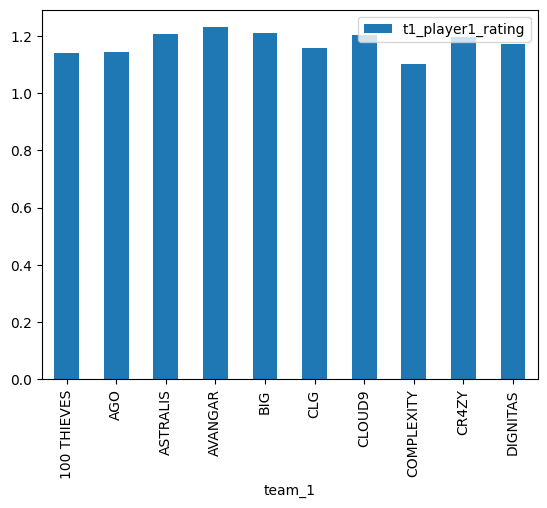

In [13]:
#team1 sütunundaki en iyi oyuncuların rating değeri
df.pivot_table(
    ['t1_player1_rating'],
    ['team_1']
).head(10).plot(kind='bar')

<Axes: xlabel='team_2'>

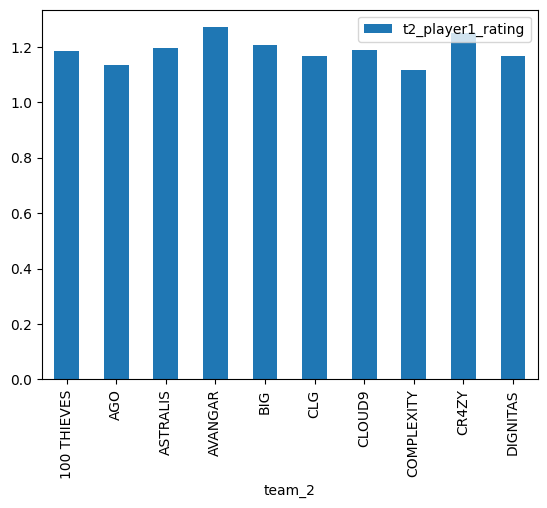

In [14]:
#team2 sütunundaki en iyi oyuncuların rating değeri
df.pivot_table(
    ['t2_player1_rating'],
    ['team_2']
).head(10).plot(kind='bar')

<Axes: xlabel='team_1'>

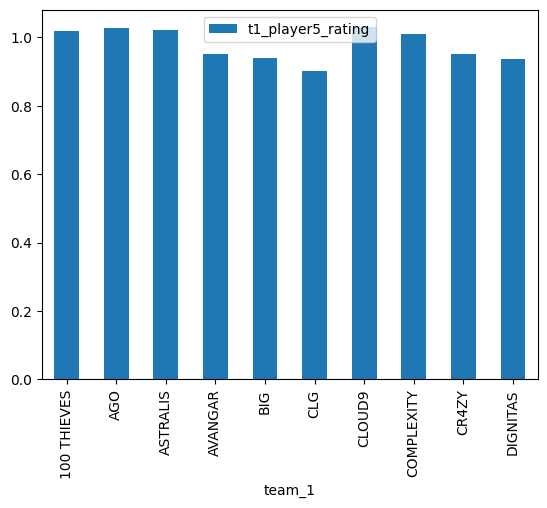

In [15]:
#team1 sütunundaki en kötü oyuncuların rating değeri
df.pivot_table(
    ['t1_player5_rating'],
    ['team_1']
).head(10).plot(kind='bar')

<Axes: xlabel='team_2'>

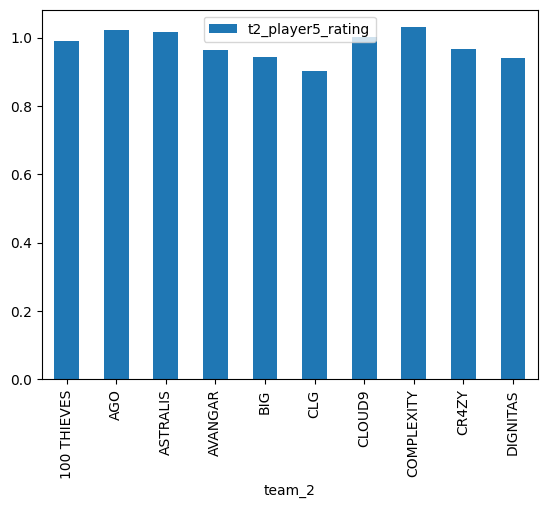

In [16]:
#team2 sütunundaki en kötü oyuncuların rating değeri
df.pivot_table(
    ['t2_player5_rating'],
    ['team_2']
).head(10).plot(kind='bar')

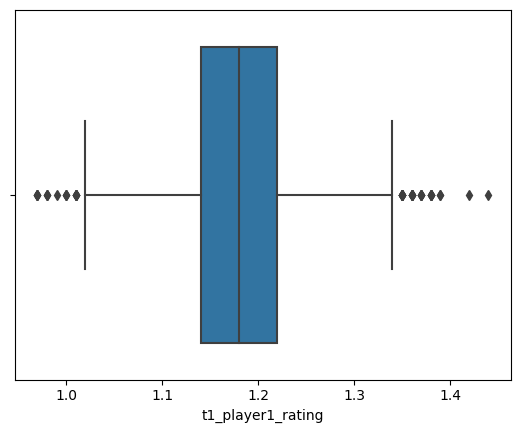

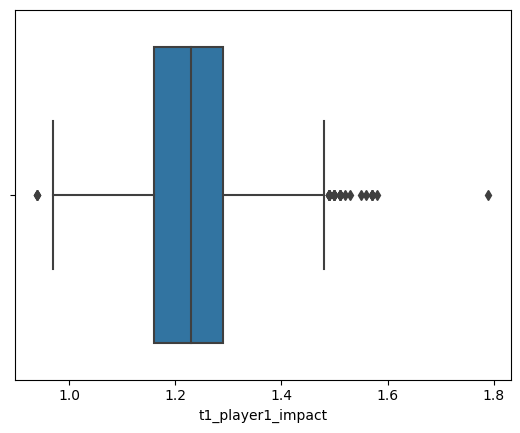

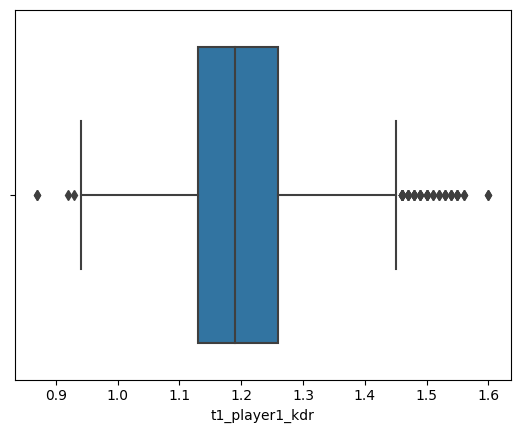

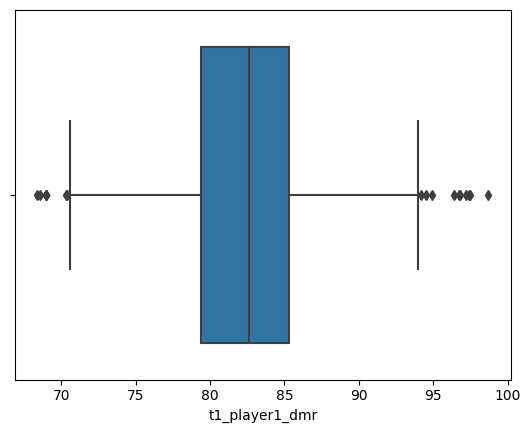

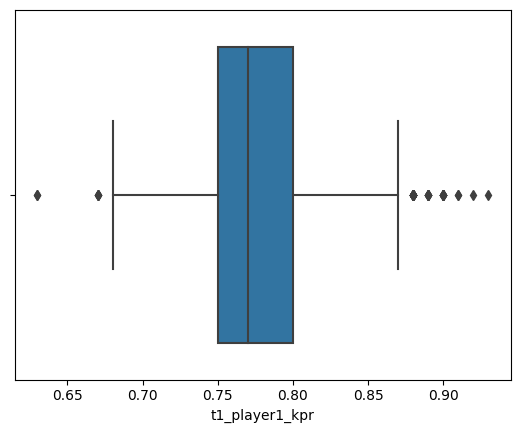

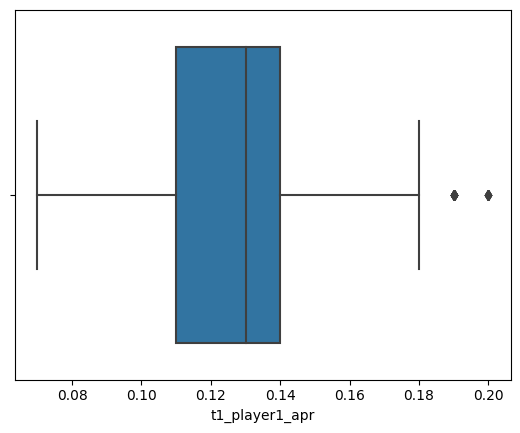

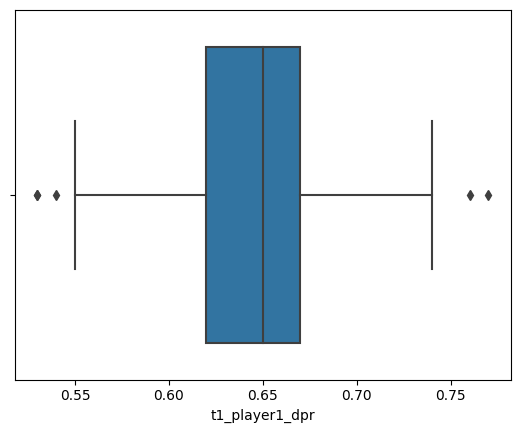

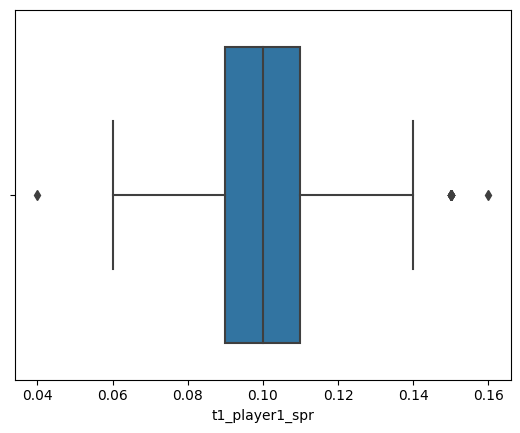

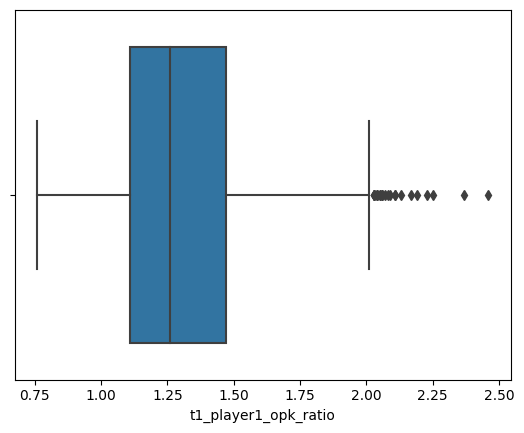

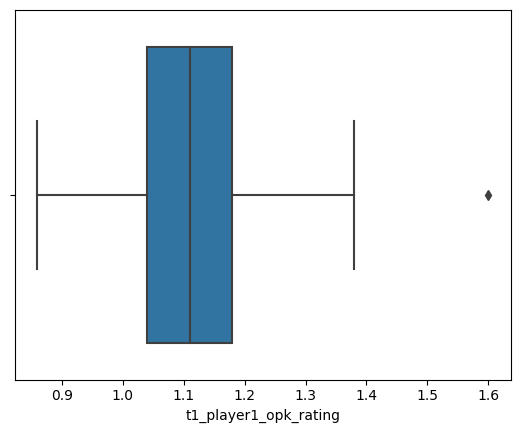

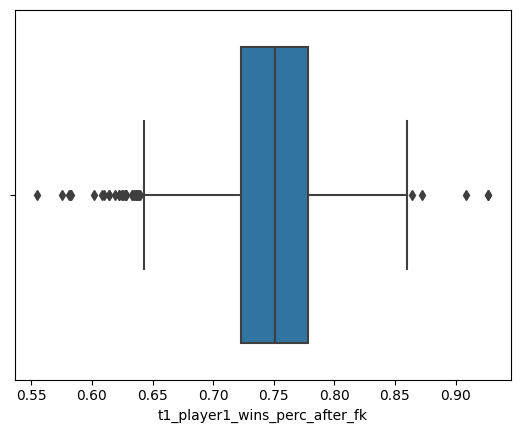

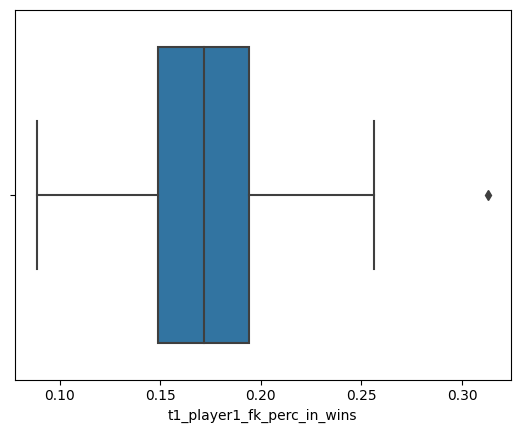

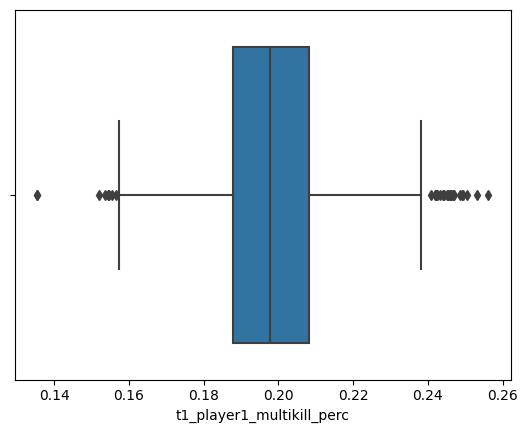

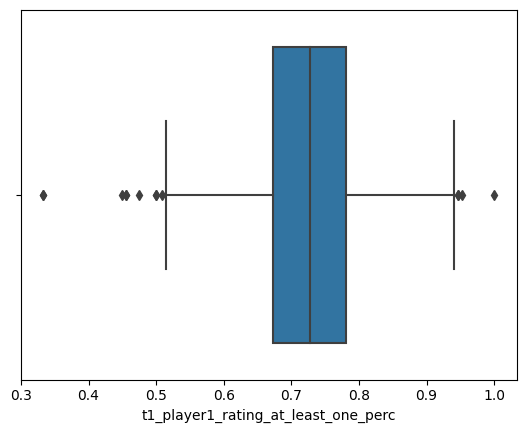

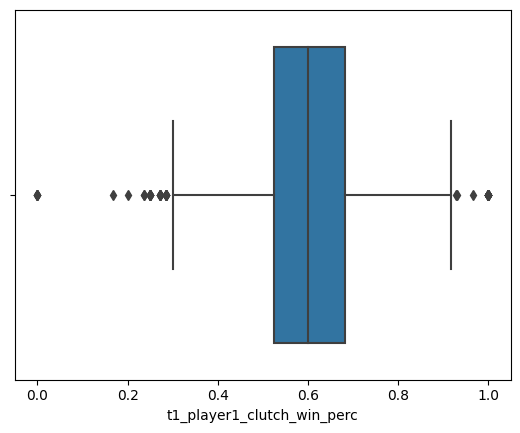

In [17]:
#en iyi ve en kötü oyuncular için boxplot değerleri çiziyoruz çünkü aradaki oyuncular bu oyunculara göre çok daha ortalama değerlere sahipler
player1_stats = df[['t1_player1_rating', 't1_player1_impact', 't1_player1_kdr', 't1_player1_dmr',
       't1_player1_kpr', 't1_player1_apr', 't1_player1_dpr',
       't1_player1_spr', 't1_player1_opk_ratio', 't1_player1_opk_rating',
       't1_player1_wins_perc_after_fk', 't1_player1_fk_perc_in_wins',
       't1_player1_multikill_perc', 't1_player1_rating_at_least_one_perc','t1_player1_clutch_win_perc']]

for col in player1_stats.columns:
    sns.boxplot(x=f'{col}', data=player1_stats)

    plt.show()

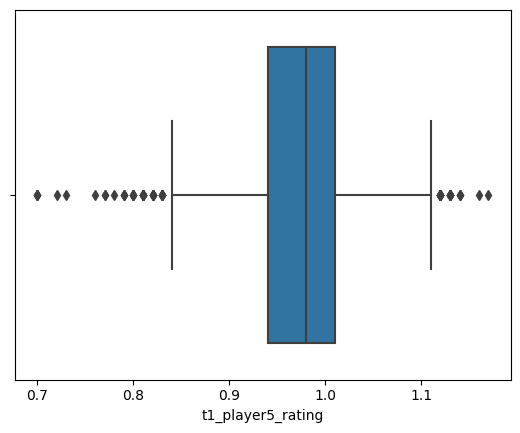

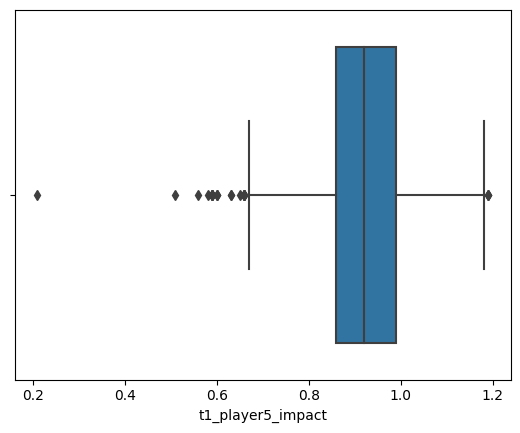

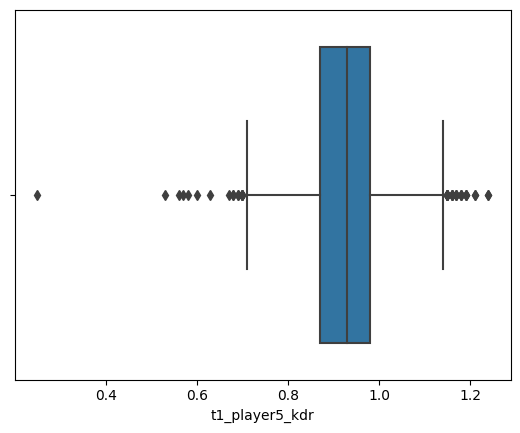

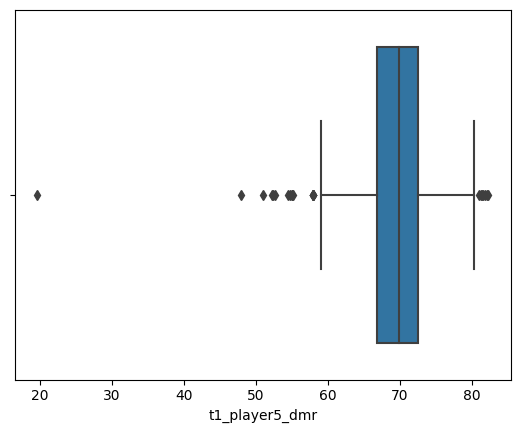

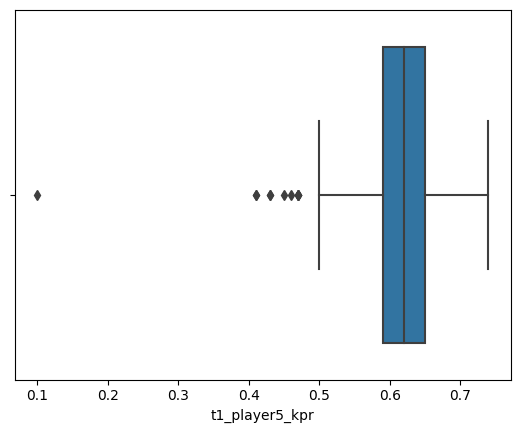

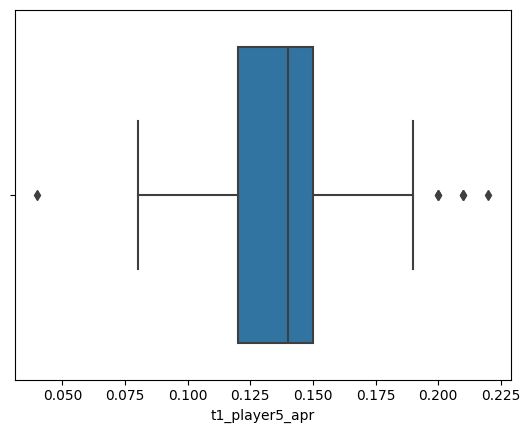

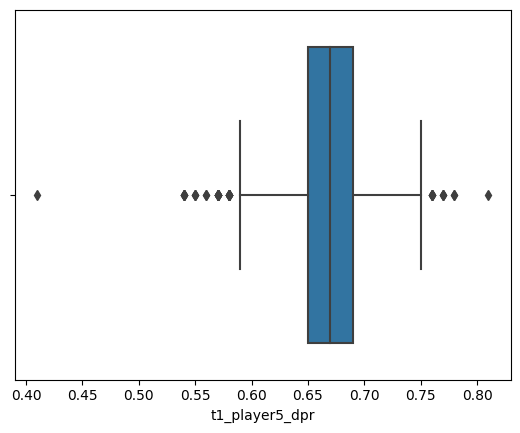

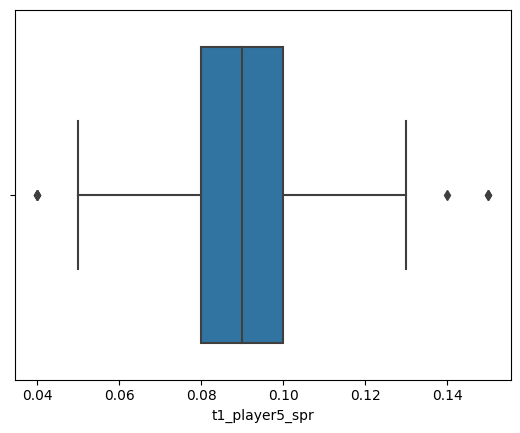

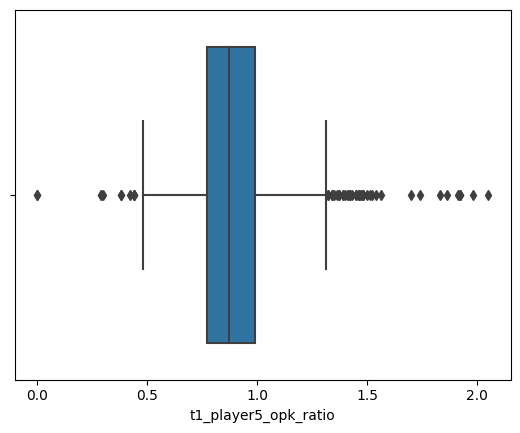

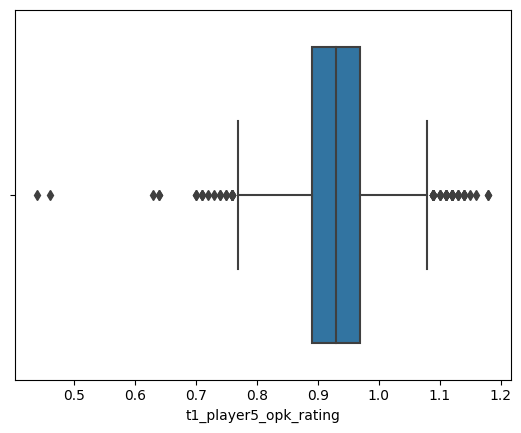

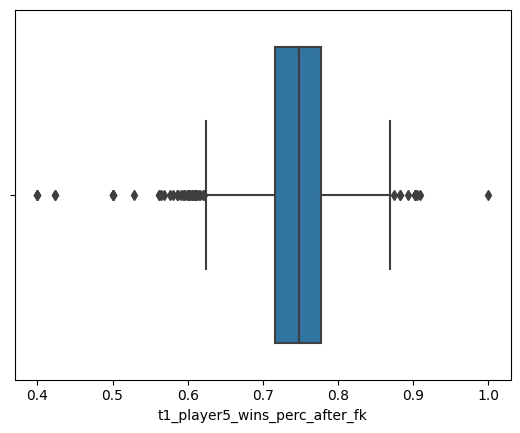

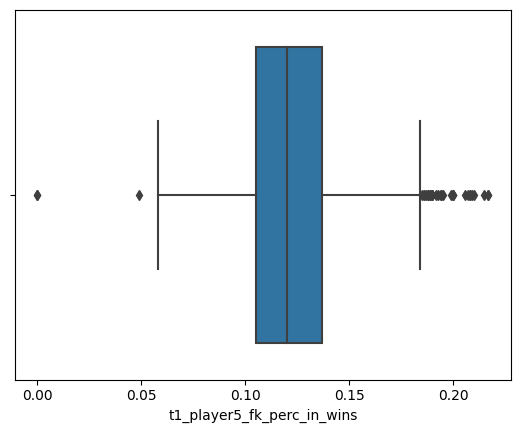

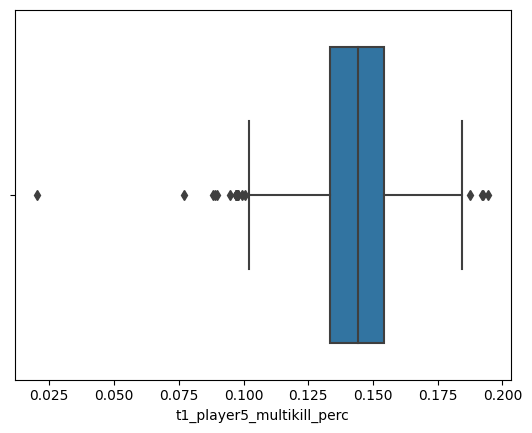

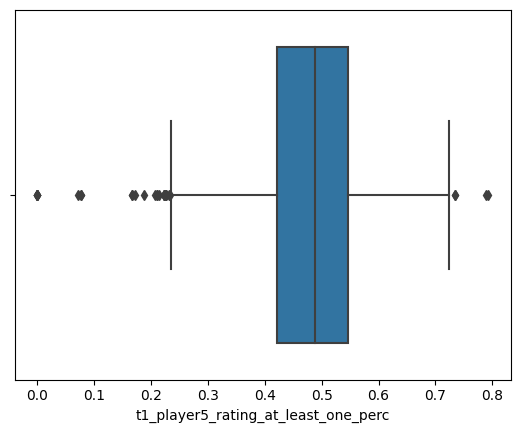

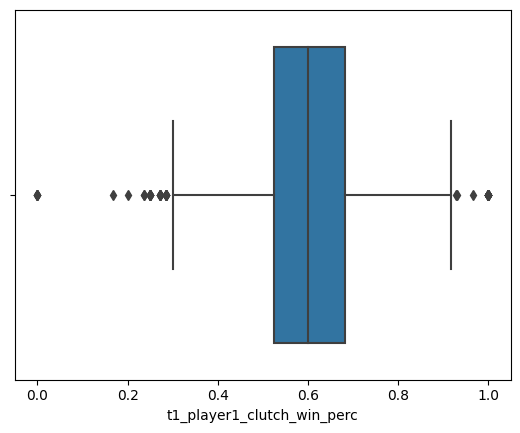

In [18]:
player5_stats = df[['t1_player5_rating', 't1_player5_impact', 't1_player5_kdr', 't1_player5_dmr',
       't1_player5_kpr', 't1_player5_apr', 't1_player5_dpr',
       't1_player5_spr', 't1_player5_opk_ratio', 't1_player5_opk_rating',
       't1_player5_wins_perc_after_fk', 't1_player5_fk_perc_in_wins',
       't1_player5_multikill_perc', 't1_player5_rating_at_least_one_perc', 't1_player1_clutch_win_perc']]

for col in player5_stats.columns:
    sns.boxplot(x=f'{col}', data=player5_stats)

    plt.show()

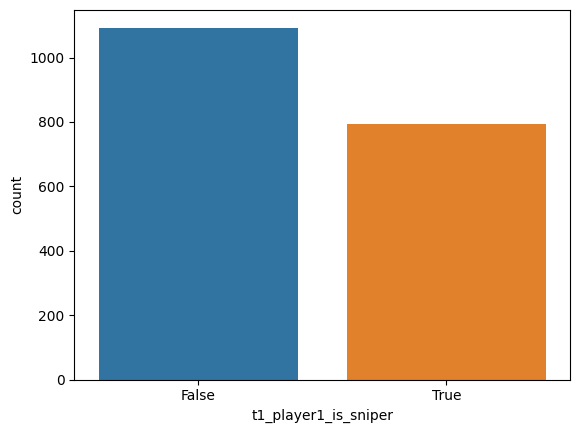

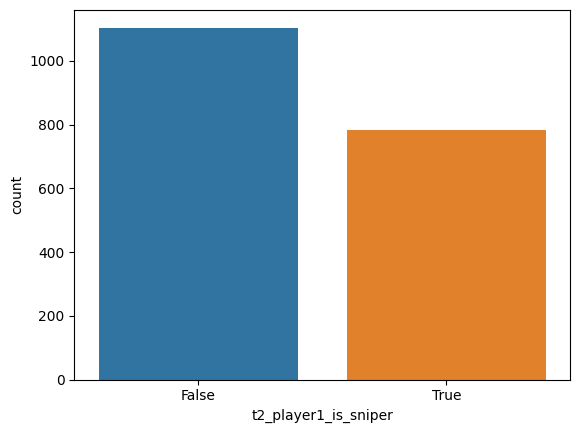

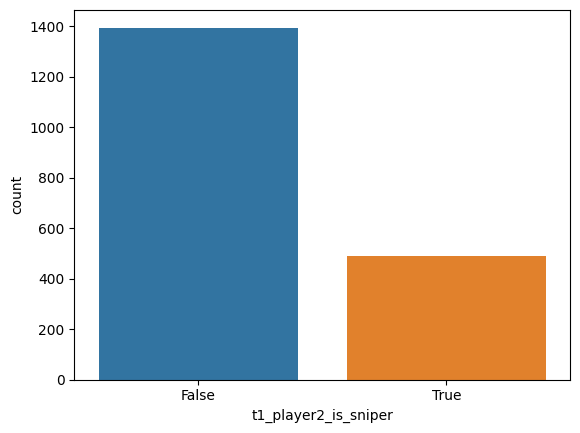

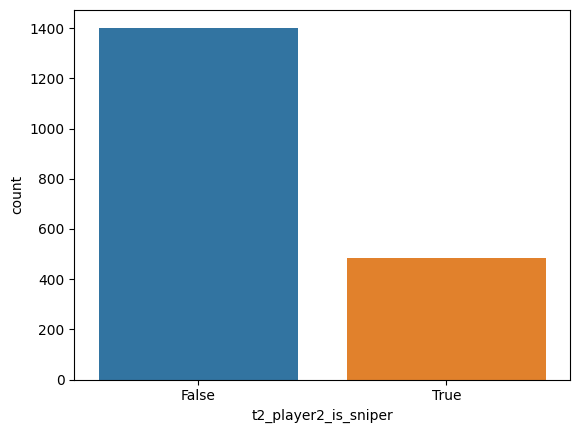

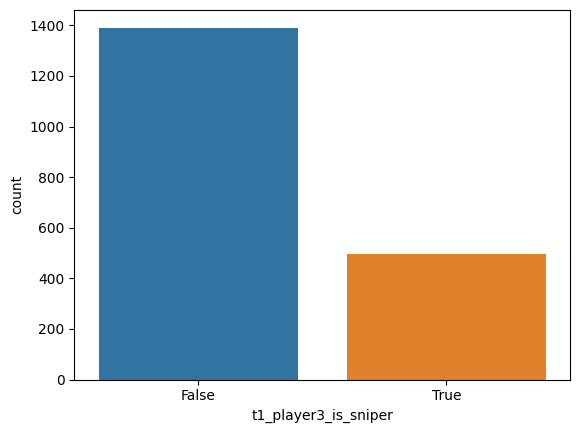

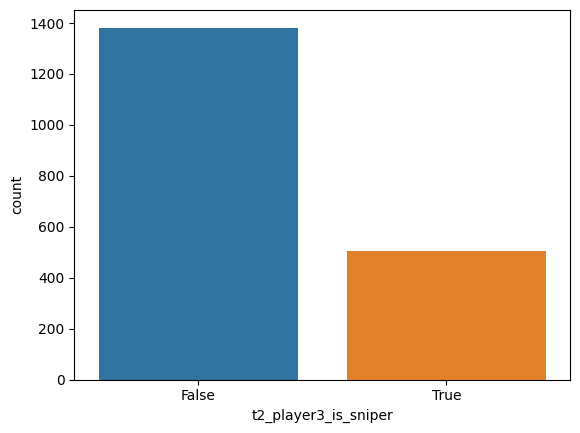

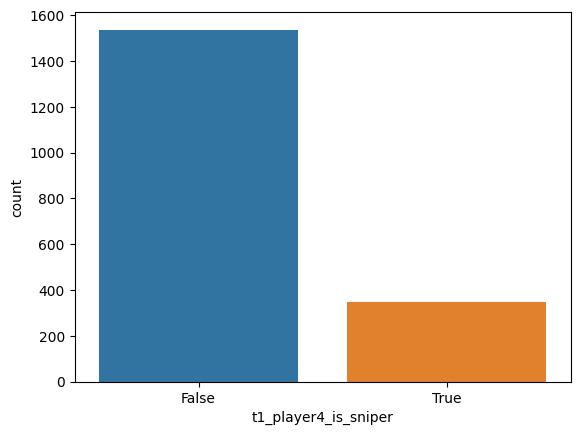

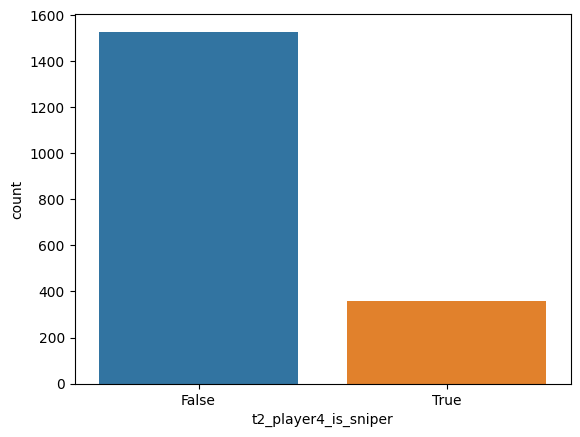

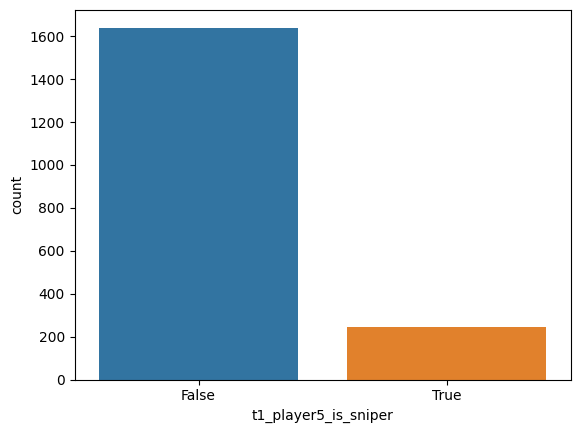

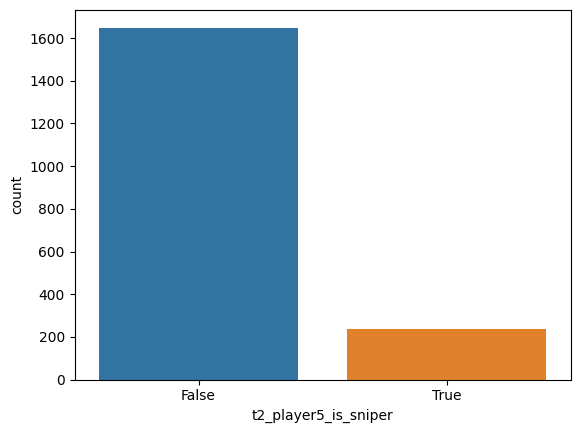

In [19]:
for i in range(1,6):
    sns.countplot(x=f't1_player{i}_is_sniper',data=df)
    plt.show()
    sns.countplot(x=f't2_player{i}_is_sniper',data=df)
    plt.show()

In [25]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

dropped_columns = ['t1_player1_is_sniper','t1_player2_is_sniper','t1_player3_is_sniper','t1_player4_is_sniper','t1_player5_is_sniper','t2_player1_is_sniper','t2_player2_is_sniper',
                  't2_player3_is_sniper','t2_player4_is_sniper','t2_player5_is_sniper','match_date','t1_points','t2_points']

X= df.drop(columns=dropped_columns,axis=1)
y = df[['t1_points','t2_points']]
column_transform = make_column_transformer((OneHotEncoder(), ['winner','team_1','team_2']))

X = column_transform.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [27]:
model = MultiOutputRegressor(GradientBoostingRegressor()).fit(X_train, y_train)

In [28]:
x_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("r2 score = ",r2_score(x_pred, y_test))
print("mean absolute error = ",mean_absolute_error(x_pred,y_test))
print("mean squared error = ",mean_squared_error(x_pred,y_test))

r2 score =  0.4208801700043234
mean absolute error =  1.6139881848996362
mean squared error =  6.616766992838931
